# Домашнее задание №2

Тема "Доверительные интервалы"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов
- Качество оформления и кода играет роль

Список заданий:
1.



In [ ]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    plt.figure(figsize=(6,4))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=16)
    plt.xlabel('$x$', fontsize=16)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

In [ ]:
def sutud_conf_int(alpha, k, mean_hat=0, std_hat=1, margin=5):
    plt.figure(figsize=(6,4))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.t(k).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=16)
    plt.xlabel('$x$', fontsize=16)

    left, right = stats.t.interval(1 - alpha, df=k, loc=mean_hat, scale=std_hat)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.t(k).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

## Задание 1  
Компания утверждает, что длина шнурков в партии обуви имеет среднее значение 120 см, и стандартное отклонение в партии точно известно и составляет 5 см. Из выборки 25 шнурков было получено среднее значение длины 122 см. Найдите 99%-ый доверительный интервал для среднего значения длины шнурков (1 балл)

In [ ]:
n = 25
x_mean = 122
sigma = 5
confidence_level = 0.99

alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha/2)

margin_of_error = z * (sigma / np.sqrt(n))

confidence_interval = (x_mean - margin_of_error, x_mean + margin_of_error)

print(f"99%-ый доверительный интервал для среднего значения длины шнурков: {confidence_interval}")

99%-ый доверительный интервал для среднего значения длины шнурков: (119.4241706964511, 124.5758293035489)


In [ ]:
x_std = sigma/np.sqrt(n)
left, right = stats.norm.interval(confidence_level, loc=x_mean, scale=x_std)
print(f"99%-ый доверительный интервал для среднего значения длины шнурков: {(left, right)}")

99%-ый доверительный интервал для среднего значения длины шнурков: (119.4241706964511, 124.5758293035489)


(-2.5758293035489004, 2.5758293035489004)

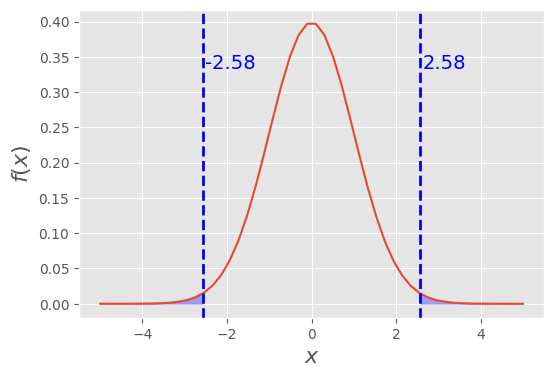

In [ ]:
norm_conf_int(alpha)

##Задание 2
Компания исследует среднее время выполнения заказа курьерской службой. Было случайным образом выбрано 10 заказов, для которых среднее время доставки составило 45 минут, а выборочная дисперсия — 9 минут. Постройте 95%-ый доверительный интервал для среднего времени доставки заказа (1 балл)

In [ ]:
n = 10
x_mean = 45
std = np.sqrt(9)
confidence_level = 0.95

alpha = 1 - confidence_level
t = stats.t.ppf(1 - alpha/2, df=n-1)

margin_of_error = t * (std / np.sqrt(n))

confidence_interval = (x_mean - margin_of_error, x_mean + margin_of_error)

print(f"95%-ый доверительный интервал для среднего времени доставки заказа: {confidence_interval}")

95%-ый доверительный интервал для среднего времени доставки заказа: (42.85392928203498, 47.14607071796502)


In [ ]:
left, right = stats.t.interval(confidence_level, df=(n-1), loc=x_mean, scale=std/np.sqrt(n))
print(f"95%-ый доверительный интервал для среднего времени доставки заказа: {(left, right)}")

95%-ый доверительный интервал для среднего времени доставки заказа: (42.85392928203498, 47.14607071796502)


(-2.2621571628540993, 2.2621571628540993)

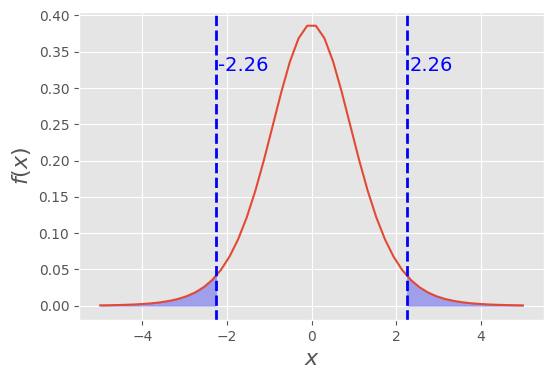

In [ ]:
sutud_conf_int(alpha, n - 1)

## Задание 3
Интернет-магазин хочет определить долю пользователей, которые возвращаются для повторной покупки в течение месяца после первой покупки. Для этого он проанализировал выборку из 800 клиентов, и оказалось, что 240 из них сделали повторную покупку в течение месяца. Необходимо определить 95% доверительный интервал для истинной доли клиентов, которые возвращаются для повторной покупки в течение этого времени (1 балл)


In [ ]:
n = 800
x = 240
p = x / n
confidence_level = 0.95

alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha/2)

margin_of_error = z * np.sqrt(p * (1 - p) / n)

confidence_interval = (p - margin_of_error, p + margin_of_error)

print(f"95%-ый доверительный интервал для истинной доли клиентов: {confidence_interval}")

95%-ый доверительный интервал для истинной доли клиентов: (0.2682449540949441, 0.3317550459050559)


## Задание 4
Два студента Тимофей и Пётр решают задачи из учебника по статистике, каждый со своей усердностью λ (количество решенных задач в день).
Тимофей считает себя более усердным студентом. Необходимо построить доверительный для разности λ1 - λ2 и проверить, правда ли это.
Студенты решают задачи независимо друг от друга (1 балл)

In [ ]:
a = [7, 5, 2, 8, 4, 9, 2, 6, 6, 7]  # Тимофей
b = [3, 3, 3, 9, 9, 2, 2, 2, 2, 9]  # Пётр

lambda1_mean = np.mean(a)
lambda2_mean = np.mean(b)
lambda1_std = np.std(a, ddof=1)
lambda2_std = np.std(b, ddof=1)
n1 = len(a)
n2 = len(b)

se_diff = np.sqrt((lambda1_std**2 / n1) + (lambda2_std**2 / n2))

t_stat = (lambda1_mean - lambda2_mean) / se_diff

df = min(n1 - 1, n2 - 1)

confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = stats.t.ppf(1 - alpha / 2, df)

margin_of_error = t_critical * se_diff

confidence_interval = (lambda1_mean - lambda2_mean - margin_of_error,
                      lambda1_mean - lambda2_mean + margin_of_error)

print(f"95%-ый доверительный интервал для разницы в средних значениях (λ1 - λ2): {confidence_interval}")

# Проверка гипотезы
# Нулевая гипотеза: λ1 - λ2 = 0 (разница в средних значениях отсутствует)
# Альтернативная гипотеза: λ1 - λ2 > 0 (Тимоти более добросовестен)
# Calculate the p-value
p_value = stats.t.cdf(-np.abs(t_stat), df)


print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value}")


if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Имеется достаточно доказательств того, что Тимохей более старателен.")
else:
    print("Не удается отвергнуть нулевую гипотезу. Нет существенных доказательств того, что Тимохей более старателен.")

95%-ый доверительный интервал для разницы в средних значениях (λ1 - λ2): (-1.649480066034974, 4.049480066034972)
T-statistic: 0.9526610232449332
Degrees of freedom: 9
P-value: 0.18282246756200143
Не удается отвергнуть нулевую гипотезу. Нет существенных доказательств того, что Тимохей более старателен.


## Задания 5-8 (5 баллов всего)

In [ ]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0  5909k      0 --:--:-- --:--:-- --:--:-- 5945k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [ ]:
df_anime = pd.read_csv('anime.csv')
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


In [ ]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df_anime['episodes'] = pd.to_numeric(df_anime['episodes'], errors='coerce')

## 5. Постройте доверительный интервал для среднего рейтинга по всем аниме (1 балл)

In [ ]:
mean_rating = df_anime['rating'].mean()
std_rating = df_anime['rating'].std()
n_rating = len(df_anime['rating'])

confidence_level = 0.95
alpha = 1 - confidence_level

z_critical = stats.norm.ppf(1 - alpha / 2)

margin_of_error = z_critical * (std_rating / np.sqrt(n_rating))

left_bound = mean_rating - margin_of_error
right_bound = mean_rating + margin_of_error

print(f"95%-ый доверительный интервал для средней оценки: {left_bound:.4}, {right_bound:.4}")

95%-ый доверительный интервал для средней оценки: 6.473, 6.514


## 6. Постройте доверительные интервалы для средних рейтингов по жанрам  (1 балл)

In [ ]:
df_copy = df_anime.copy()
df_copy['genre'] = df_copy['genre'].str.split(', ')
df_exploded = df_copy.explode('genre')

genre_stats = df_exploded.groupby('genre')['rating'].agg(['mean', 'std', 'count'])

confidence_level = 0.95
degrees_of_freedom = genre_stats['count'] - 1

t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

genre_stats['margin_of_error'] = t_value * (genre_stats['std'] / np.sqrt(genre_stats['count']))

genre_stats['lower_bound'] = genre_stats['mean'] - genre_stats['margin_of_error']
genre_stats['upper_bound'] = genre_stats['mean'] + genre_stats['margin_of_error']

print(genre_stats[['mean', 'lower_bound', 'upper_bound']])

                   mean  lower_bound  upper_bound
genre                                            
Action         6.808614     6.771787     6.845440
Adventure      6.747665     6.711213     6.784117
Cars           6.468611     6.191506     6.745716
Comedy         6.622348     6.590879     6.653817
Dementia       4.991617     4.842515     5.140720
Demons         6.745760     6.603148     6.888373
Drama          6.994149     6.954037     7.034262
Fantasy        6.675725     6.636140     6.715310
Game           6.812275     6.686840     6.937711
Harem          6.994859     6.897314     7.092404
Historical     6.762330     6.690991     6.833670
Horror         6.454669     6.329950     6.579387
Josei          7.443077     7.227387     7.658767
Kids           6.101448     6.050801     6.152094
Magic          6.821420     6.758121     6.884718
Martial Arts   6.850684     6.738615     6.962753
Mecha          6.653543     6.593396     6.713689
Military       7.021432     6.933618     7.109246


## 7. Постройте доверительные интервалы среднего рейтинга по типам аниме (1 балл)

In [ ]:
type_stats = df_anime.groupby('type')['rating'].agg(['mean', 'std', 'count'])

confidence_level = 0.95
degrees_of_freedom = type_stats['count'] - 1

t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

type_stats['margin_of_error'] = t_value * (type_stats['std'] / np.sqrt(type_stats['count']))

type_stats['lower_bound'] = type_stats['mean'] - type_stats['margin_of_error']
type_stats['upper_bound'] = type_stats['mean'] + type_stats['margin_of_error']

print(type_stats[['mean', 'lower_bound', 'upper_bound']])

             mean  lower_bound  upper_bound
type                                       
Movie    6.311996     6.261929     6.362064
Music    5.584259     5.498964     5.669554
ONA      5.633297     5.545233     5.721361
OVA      6.474058     6.432808     6.515308
Special  6.523434     6.477503     6.569365
TV       6.900149     6.870712     6.929585


## 8. По доверительным интервалам для episodes, rating и members оцените количество аномалий (2 балла)

In [ ]:
# Функция для вычисления доверительных интервалов и определения аномалий
def find_anomalies(df, column, confidence_level=0.95):
    mean = df[column].mean()
    std = df[column].std()
    count = df[column].count()

    # Вычисление t-значения для доверительного интервала
    t_value = stats.t.ppf((1 + confidence_level) / 2, count - 1)

    # Вычисление доверительного интервала
    margin_of_error = t_value * (std / np.sqrt(count))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    print(f"Доверительный интервал для {column}: ({lower_bound}, {upper_bound})")
    # Определение аномалий
    anomalies = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return anomalies

In [ ]:
# Оценка аномалий для столбцов episodes, rating и members
anomalies_episodes = find_anomalies(df_anime, 'episodes')
anomalies_rating = find_anomalies(df_anime, 'rating')
anomalies_members = find_anomalies(df_anime, 'members')

print(f"Количество аномалий в столбце episodes: {len(anomalies_episodes)}")
print(f"Количество аномалий в столбце rating: {len(anomalies_rating)}")
print(f"Количество аномалий в столбце members: {len(anomalies_members)}")
print(f"Общее количество: {len(df_anime)}")

Доверительный интервал для episodes: (12.824527795848395, 14.786692290459962)
Доверительный интервал для rating: (6.473273976757219, 6.5145235901527565)
Доверительный интервал для members: (17396.251532555976, 19561.600079116728)
Количество аномалий в столбце episodes: 9633
Количество аномалий в столбце rating: 10085
Количество аномалий в столбце members: 10376
Общее количество: 10486


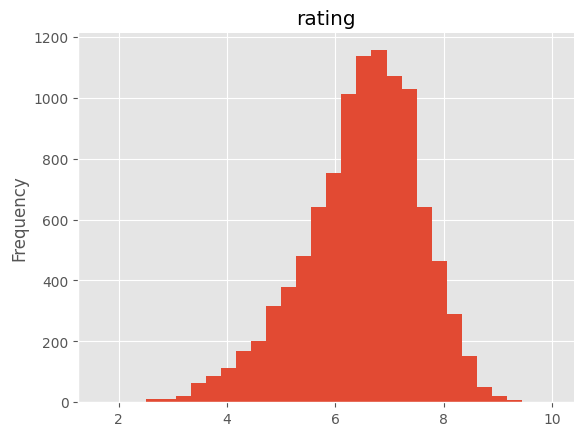

In [ ]:
df_anime['rating'].plot(kind='hist', bins=30, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

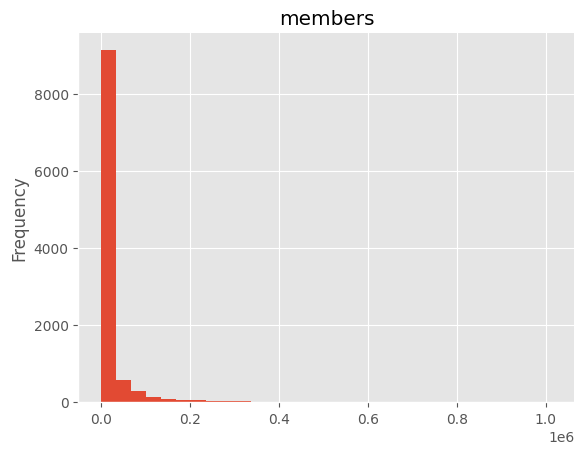

In [ ]:
df_anime['members'].plot(kind='hist', bins=30, title='members')
plt.gca().spines[['top', 'right',]].set_visible(False)

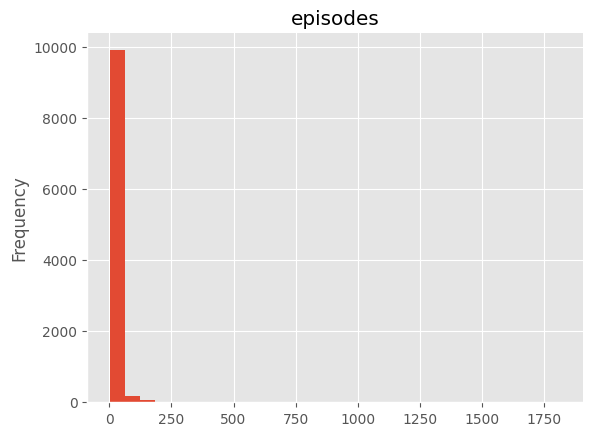

In [ ]:
df_anime['episodes'].plot(kind='hist', bins=30, title='episodes')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Задания 9-15. Продуктовые метрики (16 баллов всего)

In [ ]:
!curl -O https://raw.githubusercontent.com/alina-zhu/datasets/refs/heads/master/customer_shopping_data.csv >> customer_shopping_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6410k  100 6410k    0     0  43.3M      0 --:--:-- --:--:-- --:--:-- 43.4M


Описание датафрейма:
- `invoice_no` - номер чека
- `customer_id` - id клиента
- `gender` - пол клиента
- `age` - возраст клиента
- `category` - категория товара
- `quantity` - количество единиц товаров в чеке
- `price` - цена товара
- `payment_method` - метод оплаты
- `invoice_date` - дата покупки


In [ ]:
df = pd.read_csv('customer_shopping_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.8+ MB


In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
0,I138884,upeszhn26j,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05
1,I317333,nyyoavbmge,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12
2,I127801,iksbmqrtj0,Male,20,Clothing,1,300.08,Cash,2021-11-09
3,I173702,zfhc107gzu,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16
4,I337046,diwrquryyt,Female,53,Books,4,60.60,Cash,2021-10-24


## 9. Посчитайте доверительный интервал для среднего возраста покупателей (1 балл)

In [ ]:
mean_age = df['age'].mean()
std_age = df['age'].std()
n_age = len(df['age'])

z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (std_age / np.sqrt(n_age))
confidence_interval_age = (mean_age - margin_of_error, mean_age + margin_of_error)

print(f"95%-ый доверительный интервал для среднего возраста клиентов: {confidence_interval_age}")

95%-ый доверительный интервал для среднего возраста клиентов: (43.33392820894491, 43.520249978613535)


In [ ]:
left, right = stats.norm.interval(confidence_level, loc=mean_age, scale=(std_age / np.sqrt(n_age)))
print(f"95%-ый доверительный интервал для среднего времени доставки заказа: {(left, right)}")

95%-ый доверительный интервал для среднего времени доставки заказа: (43.33392820894491, 43.520249978613535)


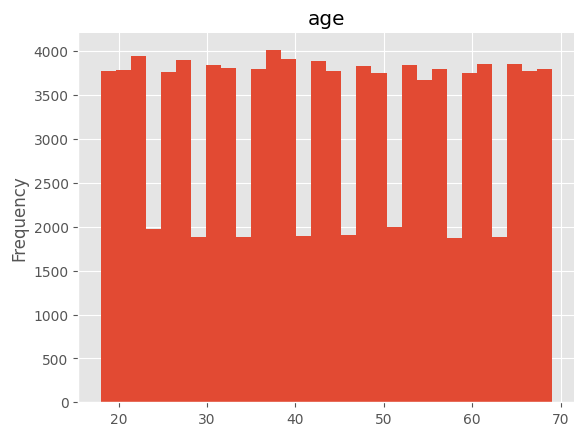

In [ ]:
df['age'].plot(kind='hist', bins=30, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## 10. Посчитайте доверительные интервалы для среднего чека в каждой категории (1 балл)

In [ ]:
def calculate_confidence_interval(data, confidence_level = 0.95):
    mean = data.mean()
    std = data.std()
    n = len(data)

    t_critical = stats.t.ppf((1 + confidence_level) / 2, n - 1)
    margin_of_error = t_critical * (std / np.sqrt(n))
    lower_bound = round(mean - margin_of_error, 2)
    upper_bound = round(mean + margin_of_error, 2)
    return (lower_bound, upper_bound)

In [ ]:
category_stats = df.groupby('category').agg({'price': lambda x: calculate_confidence_interval(x)})
print(category_stats)

                              price
category                           
Books                (44.97, 46.17)
Clothing           (896.61, 905.56)
Cosmetics          (121.53, 123.37)
Food & Beverage      (15.55, 15.79)
Shoes            (1790.85, 1823.93)
Souvenir             (34.44, 35.35)
Technology       (3115.84, 3198.03)
Toys               (106.75, 108.72)


## 11. Посчитайте доверительные интервалы для среднего чека для каждого типа оплаты (1 балл)

In [ ]:
payment_stats = df.groupby('payment_method').agg({'price': lambda x: calculate_confidence_interval(x)})
print(payment_stats)

                           price
payment_method                  
Cash            (682.06, 699.59)
Credit Card     (678.65, 698.43)
Debit Card       (674.1, 699.96)


## 12. Посчитайте доверительный интервал для среднего количества позиций в чеке (1 балл)

In [ ]:
sample_mean = df['quantity'].mean()
sample_std = df['quantity'].std(ddof=1)
n = len(df)

alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

margin_of_error = t_critical * (sample_std / (n ** 0.5))
lower_bound = round(sample_mean - margin_of_error, 2)
upper_bound = round(sample_mean + margin_of_error, 2)

print(f"Доверительный интервал для среднего количества позиций в чеке (95%): ({round(lower_bound, 1)}, {round(upper_bound, 1)}), {(upper_bound - lower_bound):.2}")

Доверительный интервал для среднего количества позиций в чеке (95%): (3.0, 3.0), 0.02


## 13. Посчитайте доверительный для среднего количества покупателей в день (1 балл)

In [ ]:
daily_customers = df.groupby('invoice_date')['customer_id'].nunique()

sample_mean = daily_customers.mean()
sample_std = daily_customers.std(ddof=1)
n = len(daily_customers)

alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

margin_of_error = t_critical * (sample_std / (n ** 0.5))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Доверительный интервал для среднего количества покупателей в день (95%): {np.round(confidence_interval, 2)}")

Доверительный интервал для среднего количества покупателей в день (95%): [123.91 125.43]




## 14. Посчитайте помесячный retention для пользователей и доверительные интервалы для него (6 баллов)
Day N Retention = (Users Day N / Users Day 0) * 100

1) Постройте график retention   
2) Добавьте на график область доверительного интервала для каждого месяца

In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [ ]:
df['cohort_month'] = df.groupby('customer_id')['invoice_date'].transform('min').dt.to_period('M')

df['invoice_month'] = df['invoice_date'].dt.to_period('M')

cohort_data = df.groupby(['cohort_month', 'invoice_month']).agg(
    n_customers=('customer_id', 'nunique')
).reset_index(drop=False)

cohort_data['cohort_period'] = (cohort_data.invoice_month - cohort_data.cohort_month).apply(lambda x: x.n)

cohort_counts = cohort_data.pivot_table(index='cohort_month', columns='cohort_period', values='n_customers')
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

retention.round(3) * 100

cohort_period,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
cohort_month,,,,,,,,,,,,,,,,,,,,,
2021-01,100.0,5.4,6.6,6.3,6.8,6.6,7.3,6.1,7.1,6.3,...,7.3,7.7,6.1,5.9,7.5,6.8,6.8,6.9,6.2,1.6
2021-02,100.0,6.8,6.3,6.8,6.2,6.5,7.0,5.8,6.4,6.7,...,6.5,6.7,5.8,6.2,6.0,6.1,6.2,6.2,1.7,NaN
2021-03,100.0,6.6,6.2,6.3,5.9,6.8,6.0,7.5,6.3,5.9,...,6.4,6.4,7.1,6.5,7.3,6.3,5.4,1.8,NaN,NaN
2021-04,100.0,6.4,6.1,6.9,5.8,6.2,6.4,6.5,6.3,7.4,...,6.2,6.8,5.8,5.9,7.0,6.0,2.0,NaN,NaN,NaN
2021-05,100.0,7.4,6.0,6.7,5.6,6.7,6.6,6.7,6.0,5.5,...,6.4,6.3,6.5,6.5,6.4,2.1,NaN,NaN,NaN,NaN
2021-06,100.0,6.7,6.2,6.9,6.4,7.0,6.1,6.2,6.1,6.2,...,6.2,6.0,5.9,5.6,1.5,NaN,NaN,NaN,NaN,NaN
2021-07,100.0,6.3,6.4,6.7,7.0,7.2,6.4,5.8,6.2,5.3,...,5.5,7.4,6.6,1.5,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,100.0,6.7,6.2,7.8,7.6,6.3,5.7,7.1,6.0,6.2,...,6.3,6.0,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,100.0,7.1,5.7,6.8,6.8,5.2,6.8,6.3,6.4,5.8,...,6.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


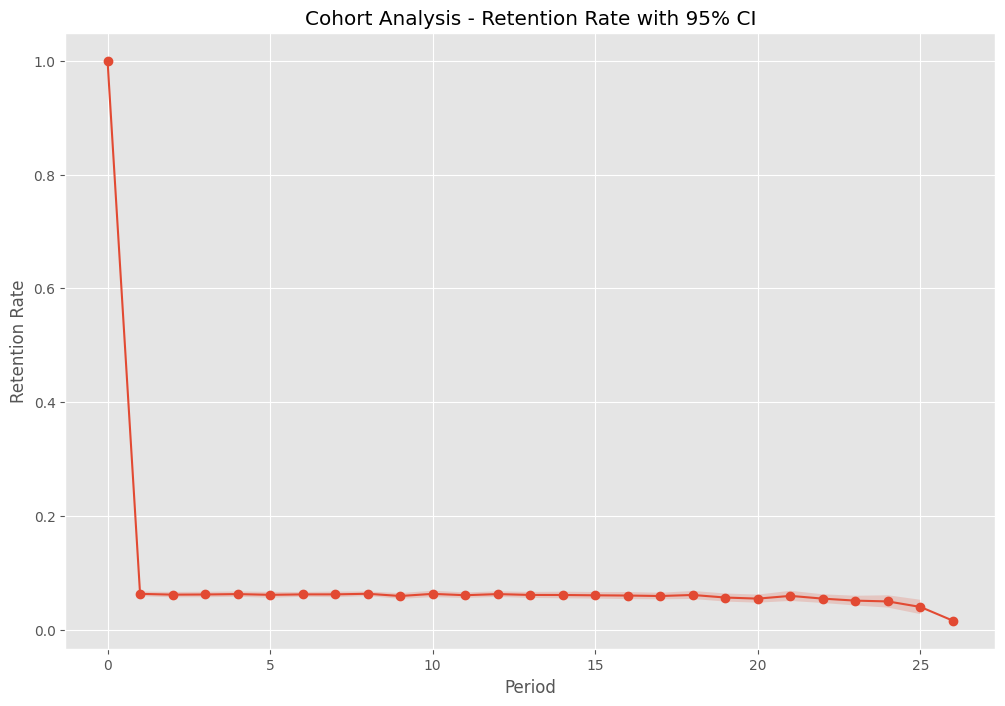

In [ ]:
confidence_level = 0.95

sem = retention.std(axis=0) / np.sqrt(retention.shape[0])
t_value = stats.t.ppf((1 + confidence_level) / 2, len(retention) - 1)

ci_low = retention.mean(axis=0) - t_value * sem
ci_high = retention.mean(axis=0) + t_value * sem

plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - Retention Rate with 95% CI')
plt.plot(retention.mean(axis=0), marker='o')
plt.fill_between(retention.columns, ci_low, ci_high, alpha=0.2)
plt.xlabel('Period')
plt.ylabel('Retention Rate')
plt.show()

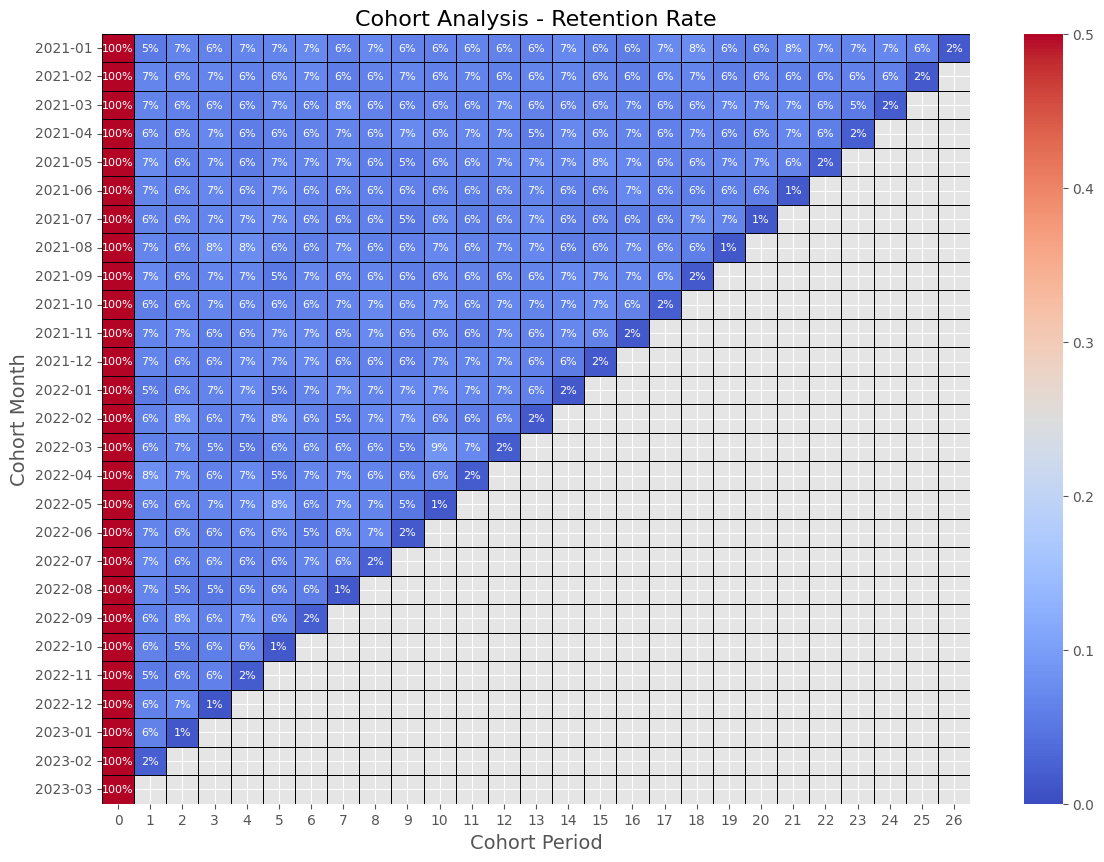

In [ ]:
retention.index = retention.index.astype(str)
retention.columns = retention.columns.astype(str)

plt.figure(figsize=(14, 10))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='coolwarm', vmin=0.0, vmax=0.5,
            annot_kws={"size": 8}, linewidths=0.5, linecolor='black')
plt.title('Cohort Analysis - Retention Rate', fontsize=16)
plt.xlabel('Cohort Period', fontsize=14)
plt.ylabel('Cohort Month', fontsize=14)
plt.show()

## 15. Посчитайте средний доход с пользователя (ARPU) в каждом месяце и доверительные интервалы для него (5 баллов)
ARPU = Average Revenue Per User  
1) Постройте график ARPU для каждого месяца      
2) Добавьте на график область доверительного интервала для каждого месяца

In [ ]:
df['total_revenue'] = df['quantity'] * df['price']

df['month'] = df['invoice_date'].dt.to_period('M')

monthly_revenue = df.groupby('month')['total_revenue'].sum()
monthly_customers = df.groupby('month')['customer_id'].nunique()

arpu = monthly_revenue / monthly_customers

std_dev = df.groupby('month')['total_revenue'].std() / np.sqrt(monthly_customers)
confidence_level = 0.95
degrees_of_freedom = monthly_customers - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

confidence_interval = t_value * std_dev

lower_bound = arpu - confidence_interval
upper_bound = arpu + confidence_interval

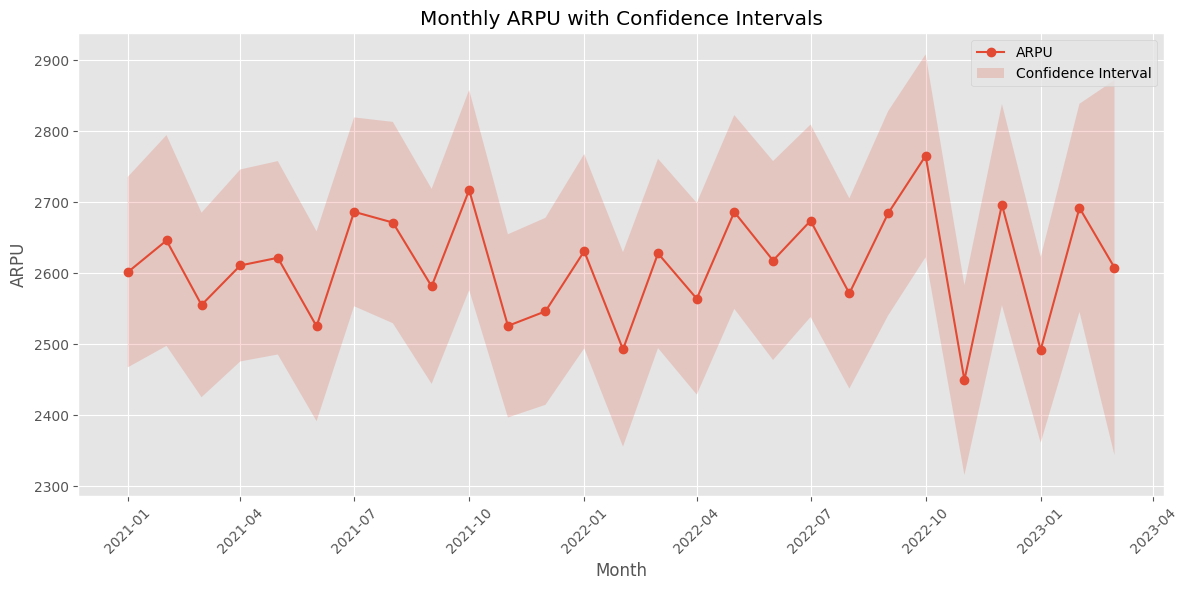

In [ ]:
months = arpu.index.to_timestamp()

plt.figure(figsize=(12, 6))

plt.plot(months, arpu, marker='o', label='ARPU')

plt.fill_between(months, lower_bound, upper_bound, alpha=0.2, label='Confidence Interval')

plt.title('Monthly ARPU with Confidence Intervals')
plt.xlabel('Month')
plt.ylabel('ARPU')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()